In [2]:
from matplotlib import pyplot as plt
import h5py
import numpy as np
from tqdm import *
from scipy import spatial

cdm = h5py.File('Data/COLOR_CDM_DM_subHaloes_z0.00_v2.hdf5', 'r')
wdm = h5py.File('Data/COLOR_WDM_DM_subHaloes_z0.00_v2.hdf5', 'r')

cdm_galaxy = h5py.File('Data\COLOR_CDM_galaxies.hdf5', 'r')
wdm_galaxy = h5py.File('Data\COLOR_WDM_galaxies.hdf5', 'r')

print(cdm,wdm,cdm_galaxy,wdm_galaxy)

<HDF5 file "COLOR_CDM_DM_subHaloes_z0.00_v2.hdf5" (mode r)> <HDF5 file "COLOR_WDM_DM_subHaloes_z0.00_v2.hdf5" (mode r)> <HDF5 file "COLOR_CDM_galaxies.hdf5" (mode r)> <HDF5 file "COLOR_WDM_galaxies.hdf5" (mode r)>


# Access the masses and positions of CDM and WDM halos

In [3]:
# Access mass/position for wdm/cdm
print(list(cdm.keys()),list(wdm.keys()))

cdm_mass = cdm['SubhaloMass'][:]
cdm_position = cdm['SubhaloPos'][:]

wdm_mass = wdm['SubhaloMass'][:]
wdm_position = wdm['SubhaloPos'][:]

cdm_mass, cdm_position, wdm_mass, wdm_position

['IsCentral', 'R200', 'SubhaloMass', 'SubhaloPos'] ['IsCentral', 'R200', 'SubhaloMass', 'SubhaloPos']


(array([1.87617493e+14, 1.84468594e+14, 6.89978024e+13, ...,
        1.76011232e+08, 1.76011232e+08, 1.76011232e+08]),
 array([[10.93832207, 81.23078918, 54.77935028],
        [17.94562721, 79.86347961, 53.3843956 ],
        [15.62266159, 78.18474579, 52.83857346],
        ...,
        [ 1.47748184,  3.54455233, 99.53264618],
        [99.32190704,  2.56014371,  2.57368279],
        [99.0621109 ,  4.18381071,  2.89533401]]),
 array([1.89941540e+14, 1.86912732e+14, 6.83256610e+13, ...,
        1.76011232e+08, 1.76011232e+08, 1.76011232e+08]),
 array([[1.80150642e+01, 7.98655701e+01, 5.34328232e+01],
        [1.09048624e+01, 8.12610779e+01, 5.48179703e+01],
        [1.56323385e+01, 7.81665344e+01, 5.28157997e+01],
        ...,
        [6.02296066e+00, 5.05078554e+00, 9.79758301e+01],
        [5.75055540e-01, 3.26677370e+00, 3.52767438e-01],
        [2.07897183e-03, 3.23730040e+00, 9.97708917e-01]]))

### Filter out central halos below the resolution limit

In [4]:
m_res = 8.8*10**6*50
m_res

440000000.0

In [5]:
# find the indices of all the central halos above the resolution limit
cdm_central_ind = np.where((cdm['IsCentral'][:] == 1)&(cdm_mass>m_res))[0]

print(cdm_central_ind)
print(cdm['IsCentral'][:][cdm_central_ind])

wdm_central_ind = np.where((wdm['IsCentral'][:] == 1)&(wdm_mass>m_res))[0]

[      0   20093   40287 ... 2633808 2633809 2633811]
[1 1 1 ... 1 1 1]


In [6]:
#access the central positions
cdm_position_central=cdm_position[cdm_central_ind]
wdm_position_central=wdm_position[wdm_central_ind]

#and the central masses
cdm_mass_central=cdm_mass[cdm_central_ind]
wdm_mass_central=wdm_mass[wdm_central_ind]

len(cdm_mass_central)

1686837

# Calculate the mass within a sphere

In [7]:
#create the trees
cdm_tree = spatial.cKDTree(cdm_position_central)
wdm_tree = spatial.cKDTree(wdm_position_central)

### First do CDM

In [8]:
# create an empty array for the mass of the spheres
cdm_5Mpc_sphere_mass = []

#iterate through each central halo
for i in trange(len(cdm_central_ind)):
    
    #find the indices of all central halos in a 5 Mpc radius around each central halo
    ind = cdm_tree.query_ball_point(cdm_position_central[i], 5)
    
    #sum the mass of these halos
    cdm_5Mpc_sphere_mass.append(np.sum(cdm_mass_central[ind]))

100%|██████████████████████████████████████████████████████████████████████| 1686837/1686837 [11:22<00:00, 2473.02it/s]


In [28]:
cdm_5Mpc_sphere_mass=np.array(cdm_5Mpc_sphere_mass)
np.savetxt("Calculations/cdm_5Mpc_sphere_mass.txt", cdm_5Mpc_sphere_mass, fmt = "%f")
len(cdm_5Mpc_sphere_mass), len(cdm_central_ind)

(1686837, 1686837)

In [9]:
# create an empty array for the mass of the spheres
cdm_10Mpc_sphere_mass = []

#iterate through each central halo
for i in trange(len(cdm_central_ind)):
    
    #find the indices of all halos in a 10 Mpc radius around each central halo
    ind = cdm_tree.query_ball_point(cdm_position_central[i], 10)
    
    #sum the mass of these halos
    cdm_10Mpc_sphere_mass.append(np.sum(cdm_mass_central[ind]))

100%|███████████████████████████████████████████████████████████████████████| 1686837/1686837 [49:29<00:00, 568.01it/s]


In [29]:
cdm_10Mpc_sphere_mass=np.array(cdm_10Mpc_sphere_mass)
np.savetxt("Calculations/cdm_10Mpc_sphere_mass.txt", cdm_10Mpc_sphere_mass, fmt = "%f")
len(cdm_10Mpc_sphere_mass), len(cdm_central_ind)

(1686837, 1686837)

### Then WDM

In [10]:
# create an empty array for the mass of the spheres
wdm_5Mpc_sphere_mass = []

#iterate through each central halo
for i in trange(len(wdm_central_ind)):
    
    #find the indices of all halos in a 5 Mpc radius around each central halo
    ind = wdm_tree.query_ball_point(wdm_position_central[i], 5)
    
    #sum the mass of these halos
    wdm_5Mpc_sphere_mass.append(np.sum(wdm_mass_central[ind]))

100%|██████████████████████████████████████████████████████████████████████| 1123039/1123039 [04:27<00:00, 4197.78it/s]


In [30]:
wdm_5Mpc_sphere_mass=np.array(wdm_5Mpc_sphere_mass)
np.savetxt("Calculations/wdm_5Mpc_sphere_mass.txt", wdm_5Mpc_sphere_mass, fmt = "%f")
len(wdm_5Mpc_sphere_mass), len(wdm_central_ind)

(1123039, 1123039)

In [11]:
# create an empty array for the mass of the spheres
wdm_10Mpc_sphere_mass = []

#iterate through each central halo
for i in trange(len(wdm_central_ind)):
    
    #find the indices of all halos in a 10 Mpc radius around each central halo
    ind = wdm_tree.query_ball_point(wdm_position_central[i], 10)
    
    #sum the mass of these halos
    wdm_10Mpc_sphere_mass.append(np.sum(wdm_mass_central[ind]))

100%|███████████████████████████████████████████████████████████████████████| 1123039/1123039 [19:23<00:00, 965.45it/s]


In [31]:
wdm_10Mpc_sphere_mass=np.array(wdm_10Mpc_sphere_mass)
np.savetxt("Calculations/wdm_10Mpc_sphere_mass.txt", wdm_10Mpc_sphere_mass, fmt = "%f")
len(wdm_10Mpc_sphere_mass), len(wdm_central_ind)

(1123039, 1123039)

# Calculate the envelope mass

In [17]:
cdm_5Mpc_sphere_mass = np.genfromtxt("Calculations/cdm_5Mpc_sphere_mass.txt")
wdm_5Mpc_sphere_mass = np.genfromtxt("Calculations/wdm_5Mpc_sphere_mass.txt")

In [18]:
cdm_10Mpc_sphere_mass = np.genfromtxt("Calculations/cdm_10Mpc_sphere_mass.txt")
wdm_10Mpc_sphere_mass = np.genfromtxt("Calculations/wdm_10Mpc_sphere_mass.txt")

In [18]:
cdm_envelope_mass=cdm_10Mpc_sphere_mass-cdm_5Mpc_sphere_mass
wdm_envelope_mass=wdm_10Mpc_sphere_mass-wdm_5Mpc_sphere_mass
len(cdm_envelope_mass),len(wdm_envelope_mass),cdm_envelope_mass, wdm_envelope_mass

(1686837, 1123039, array([2.30475009e+14, 2.11744232e+14, 8.66963769e+13, ...,
        1.17753809e+13, 1.48210265e+13, 3.91143610e+12]), array([2.43274622e+14, 2.12183101e+14, 8.18718559e+13, ...,
        1.89969544e+13, 8.35765614e+12, 4.01062728e+12]))

# Check with histograms

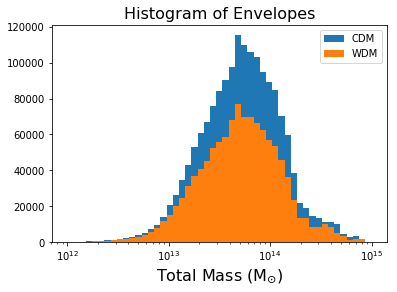

In [19]:
bins=np.logspace(np.log10(1e12),np.log10(1e15), 50)
plt.hist(cdm_envelope_mass,bins=bins,label='CDM')
plt.hist(wdm_envelope_mass,bins=bins,label='WDM')
plt.xscale("Log")
plt.xlabel("Total Mass (M$_{\odot}$)", fontsize=16)
plt.title("Histogram of Envelopes", fontsize=16)
plt.legend()
plt.show()

In [20]:
frac = 20.0
th_low_cdm = np.percentile(cdm_envelope_mass,frac)
th_top_cdm = np.percentile(cdm_envelope_mass,100.-frac)
th_low_wdm = np.percentile(wdm_envelope_mass,frac)
th_top_wdm = np.percentile(wdm_envelope_mass,100.-frac)

cdm_top_envelope_mass = cdm_envelope_mass[cdm_envelope_mass>th_top_cdm]
cdm_low_envelope_mass = cdm_envelope_mass[cdm_envelope_mass<th_low_cdm]
wdm_top_envelope_mass = wdm_envelope_mass[wdm_envelope_mass>th_top_wdm]
wdm_low_envelope_mass = wdm_envelope_mass[wdm_envelope_mass<th_low_wdm]

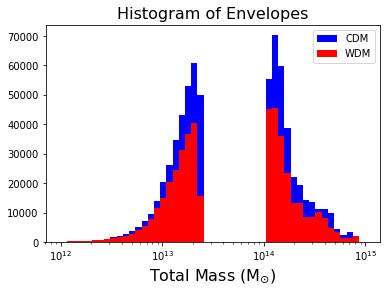

In [21]:
bins=np.logspace(np.log10(1e12),np.log10(1e15), 50)
plt.hist(cdm_top_envelope_mass, bins=bins,label='CDM',color='blue')
plt.hist(cdm_low_envelope_mass,bins=bins,color='blue')
plt.hist(wdm_top_envelope_mass, bins=bins,label='WDM',color='red')
plt.hist(wdm_low_envelope_mass,bins=bins,color='red')
plt.xscale("Log")
plt.xlabel("Total Mass (M$_{\odot}$)", fontsize=16)
plt.title("Histogram of Envelopes", fontsize=16)
plt.legend()
plt.show()

# Find the corresponding galaxies!
### First access the positions of CDM and WDM galaxies

In [23]:
print(list(cdm_galaxy.keys()),list(wdm_galaxy.keys()))

cdm_galaxy_position = cdm_galaxy['GalaxyPos'][:]
wdm_galaxy_position = wdm_galaxy['GalaxyPos'][:]

cdm_galaxy_position, wdm_galaxy_position

['Colour', 'GalaxyPos', 'IsCentral', 'StellarMass'] ['Colour', 'GalaxyPos', 'IsCentral', 'StellarMass']


(array([[17.43208122, 80.25539398, 54.00876999],
        [17.43210793, 80.22522736, 53.97425079],
        [19.06316185, 80.02703857, 54.18655014],
        ...,
        [67.22305298, 64.69418335, 36.19010544],
        [ 7.28926134, 78.05925751, 49.41135025],
        [ 6.75961494, 77.04682159, 48.55372238]]),
 array([[17.61932182, 79.06235504, 52.68593979],
        [18.65647697, 80.58162689, 52.30108261],
        [18.58250046, 80.91363525, 52.45199203],
        ...,
        [76.68208313, 28.50509262, 59.96631622],
        [33.62237167,  9.74790382,  4.82571173],
        [52.58901978, 44.79496765, 78.47211456]]))

In [24]:
#make a tree of galaxies to query
cdm_galaxy_tree = spatial.cKDTree(cdm_galaxy_position)
wdm_galaxy_tree = spatial.cKDTree(wdm_galaxy_position)

In [25]:
# create an empty array for the number of galaxies
cdm_galaxy_abundance = []

#iterate through each central halo
for i in trange(len(cdm_central_ind)):
    
    #find the indices of all galaxies within the virial radius around each central halo
    ind = cdm_galaxy_tree.query_ball_point(cdm_position_central[i],cdm['R200'][cdm_central_ind[i]])
    
    #sum the number of galaxies found within each host halo
    cdm_galaxy_abundance.append(len(ind))
    
    #check that only one central galaxy is assigned to each host halo
    central_abundance=np.sum(cdm_galaxy['IsCentral'][ind])
    if central_abundance>1:
        print(i,central_abundance,ind)
        break

100%|██████████████████████████████████████████████████████████████████████| 1686837/1686837 [11:16<00:00, 2493.96it/s]


In [35]:
cdm_galaxy_abundance=np.array(cdm_galaxy_abundance)
np.savetxt("Calculations/cdm_galaxy_abundance.txt", cdm_galaxy_abundance, fmt = "%f")
len(cdm_galaxy_abundance), len(cdm_central_ind)

(1686837, 1686837)

In [36]:
# create an empty array for the number of galaxies
wdm_galaxy_abundance = []

#iterate through each central halo
for i in trange(len(wdm_central_ind)):
    
    #find the indices of all galaxies within the virial radius around each central halo
    ind = cdm_galaxy_tree.query_ball_point(wdm_position_central[i],wdm['R200'][cdm_central_ind[i]])
    
    #sum the number of galaxies found within each host halo
    wdm_galaxy_abundance.append(len(ind))
    
    #check that only one central galaxy is assigned to each host halo
    central_abundance=np.sum(cdm_galaxy['IsCentral'][ind])
    if wdm_central_abundance>1:
        print(i,central_abundance,ind)
        break

100%|██████████████████████████████████████████████████████████████████████| 1123039/1123039 [06:59<00:00, 2678.23it/s]


In [44]:
wdm_galaxy_abundance=np.array(wdm_galaxy_abundance)
np.savetxt("Calculations/wdm_galaxy_abundance.txt", wdm_galaxy_abundance, fmt = "%f")
len(wdm_galaxy_abundance), len(wdm_central_ind)

(1123039, 1123039)

# Compare galaxy abundance in the most/least dense environments

In [23]:
cdm_galaxy_abundance = np.genfromtxt("Calculations/cdm_galaxy_abundance.txt")
wdm_galaxy_abundance = np.genfromtxt("Calculations/wdm_galaxy_abundance.txt")

In [24]:
cdm_top_galaxy_abundance = cdm_galaxy_abundance[cdm_envelope_mass>th_top_cdm]
cdm_low_galaxy_abundance = cdm_galaxy_abundance[cdm_envelope_mass<th_low_cdm]
wdm_top_galaxy_abundance = wdm_galaxy_abundance[wdm_envelope_mass>th_top_wdm]
wdm_low_galaxy_abundance = wdm_galaxy_abundance[wdm_envelope_mass<th_low_wdm]

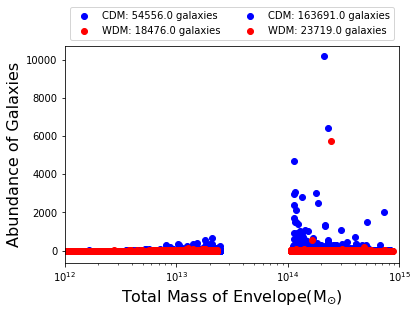

In [25]:
plt.scatter(cdm_low_envelope_mass,cdm_low_galaxy_abundance,color='blue',
            label='CDM: '+np.str(np.sum(cdm_low_galaxy_abundance))+' galaxies')
plt.scatter(wdm_low_envelope_mass,wdm_low_galaxy_abundance,color='red',
            label='WDM: '+np.str(np.sum(wdm_low_galaxy_abundance))+' galaxies')
plt.scatter(cdm_top_envelope_mass,cdm_top_galaxy_abundance,color='blue',
            label='CDM: '+np.str(np.sum(cdm_top_galaxy_abundance))+' galaxies')
plt.scatter(wdm_top_envelope_mass,wdm_top_galaxy_abundance,color='red',
            label='WDM: '+np.str(np.sum(wdm_top_galaxy_abundance))+' galaxies')
plt.legend(ncol=2,bbox_to_anchor=(0., 1.1, 1., .102),loc='upper center')
plt.xlabel("Total Mass of Envelope(M$_{\odot}$)", fontsize=16)
plt.ylabel("Abundance of Galaxies",fontsize=16)
plt.xlim(10e11,10e14)
plt.xscale("Log")
plt.show()

### Total galaxies in the least dense environments

In [26]:
print('CDM:',np.sum(cdm_low_galaxy_abundance))
print('WDM:',np.sum(wdm_low_galaxy_abundance))

CDM: 54556.0
WDM: 18476.0


### Total galaxies in the most dense environments

In [27]:
print('CDM:',np.sum(cdm_top_galaxy_abundance))
print('WDM:',np.sum(wdm_top_galaxy_abundance))

CDM: 163691.0
WDM: 23719.0
